In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Processing and Exploratory Data Analysis

In [11]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1) #removing unecessary data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X=df.drop('Exited',axis=1)
y=df['Exited']

Gender
Male      5457
Female    4543
Name: count, dtype: int64


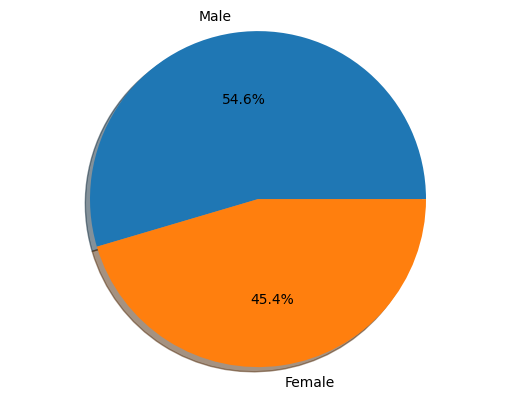

In [13]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

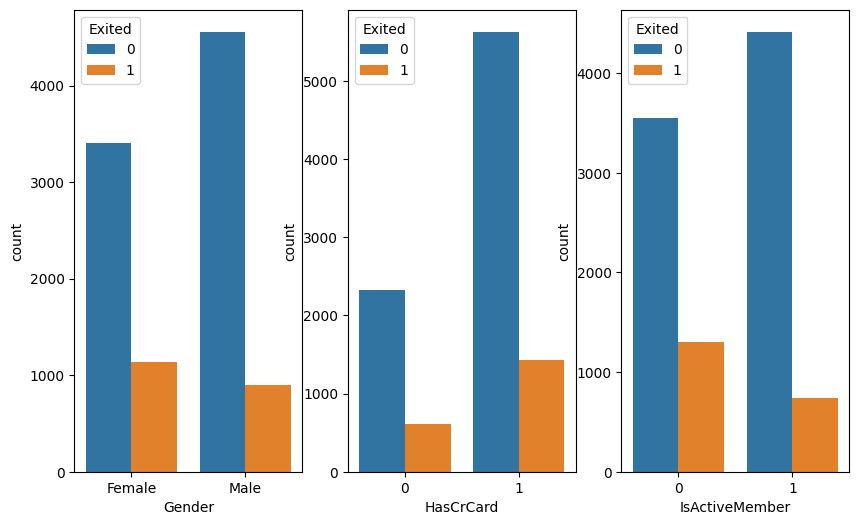

In [14]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
categorical_features=['Gender','HasCrCard','IsActiveMember']
for i, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(x = i, hue="Exited", data = df, ax = subplot)

plt.show()

In [15]:
#converting categorical columns, geography, and gender, to numerical ones
X['Geography'].head()

0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LabelEncoder = LabelEncoder()
df['Geography'] = LabelEncoder.fit_transform(X['Geography'])
df['Gender'] = LabelEncoder.fit_transform(X['Gender'])

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


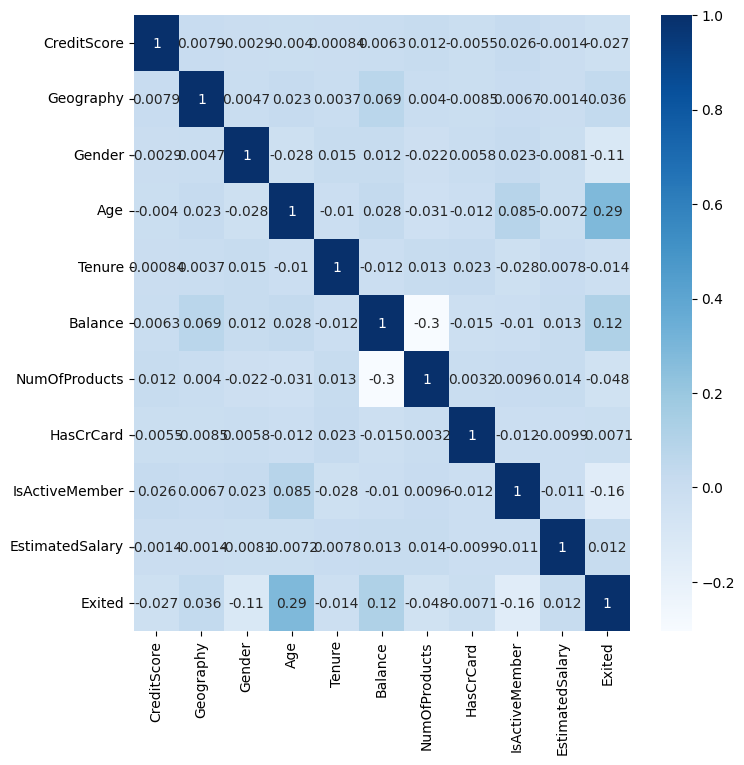

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [40]:
X_train

array([[ 1.07684322,  1.50034763,  0.90565911, ...,  0.64722807,
         0.96581473,  0.56276126],
       [ 0.22458265,  1.50034763, -1.10416821, ...,  0.64722807,
         0.96581473, -1.58504165],
       [-0.46138317, -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -1.07751299],
       ...,
       [ 0.85858137, -0.90168675, -1.10416821, ..., -1.54505043,
        -1.03539526, -0.1530867 ],
       [ 0.1518287 , -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -0.06146547],
       [ 0.46363135,  0.29933044,  0.90565911, ...,  0.64722807,
         0.96581473, -0.82256561]])

Decession Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(X_train,y_train)

In [45]:
y_predTree = dTree.predict(X_test)

In [ ]:
from sklearn import metrics
acc_dTree = metrics.accuracy_score(y_test, y_predTree)

In [50]:
acc_dTree

0.8508571428571429

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdForest = RandomForestClassifier(n_estimators=100) #warning 10 to 100
rdForest.fit(X_train,y_train)
y_predForest=rdForest.predict(X_test)
acc_predForest = metrics.accuracy_score(y_test, y_predForest)

In [52]:
acc_predForest

0.8665714285714285

SVM

In [55]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)
y_predsvm=svm.predict(X_test)
acc_predsvm =metrics.accuracy_score(y_test, y_predsvm)
acc_predsvm

0.864

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)
acc_predlr =metrics.accuracy_score(y_test, y_predlr)
acc_predlr

0.698